In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set()

An essential piece of analysis of large data is efficient summarization: computing
aggregations like sum() , mean() , median() , min() , and max() , in which a single num‐
ber gives insight into the nature of a potentially large dataset. In this section, we’ll
explore aggregations in Pandas, from simple operations akin to what we’ve seen on
NumPy arrays, to more sophisticated operations based on the concept of a groupby .

In [27]:
planets = sns.load_dataset("planets")
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [28]:
planets.describe()

,number,orbital_period,mass,distance,year
count,1035.000000,992.000000,513.000000,808.000000,1035.000000
mean,1.785507,2002.917596,2.638161,264.069282,2009.070531
std,1.240976,26014.728304,3.818617,733.116493,3.972567
min,1.000000,0.090706,0.003600,1.350000,1989.000000
25%,1.000000,5.442540,0.229000,32.560000,2007.000000
50%,1.000000,39.979500,1.260000,55.250000,2010.000000
75%,2.000000,526.005000,3.040000,178.500000,2012.000000
max,7.000000,730000.000000,25.000000,8500.000000,2014.000000


# Simple Aggregation in Pandas

###  Example Series

In [4]:

np.random.seed(42)

ser = pd.Series(np.random.rand(6))

ser.sum(), ser.mean(), ser.median()

(2.9679200120443596, 0.4946533353407266, 0.48659930152219955)

### Example DataFrame

In [5]:
# For a DataFrame , by default the aggregates return results within each column:
np.random.seed(42)

df = pd.DataFrame({"A" : np.random.rand(6) , "B" : np.random.rand(6)})

df

,A,B
0,0.374540,0.058084
1,0.950714,0.866176
2,0.731994,0.601115
3,0.598658,0.708073
4,0.156019,0.020584
5,0.155995,0.969910


In [6]:
# Calc mean by column
df.mean(), df.sum()

(A    0.494653
 B    0.537324
 dtype: float64,
 A    2.967920
 B    3.223942
 dtype: float64)

In [7]:
# We can calc mean by row with setting axis=1 or axis='columns'
df.mean(axis="columns")

0    0.216312
1    0.908445
2    0.666554
3    0.653366
4    0.088302
5    0.562952
dtype: float64

Pandas Series and DataFrame s include all of the common aggregates mentioned in. In addition, there
is a convenience method `describe()` that computes several common aggregates for
each column and returns the result. Let’s use this on the **planets** data, for now drop‐
ping rows with missing values:

In [29]:
planets.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

In [30]:
# remove all missing data (if it has)
planets.dropna().describe()

,number,orbital_period,mass,distance,year
count,498.00000,498.000000,498.000000,498.000000,498.000000
mean,1.73494,835.778671,2.509320,52.068213,2007.377510
std,1.17572,1469.128259,3.636274,46.596041,4.167284
min,1.00000,1.328300,0.003600,1.350000,1989.000000
25%,1.00000,38.272250,0.212500,24.497500,2005.000000
50%,1.00000,357.000000,1.245000,39.940000,2009.000000
75%,2.00000,999.600000,2.867500,59.332500,2011.000000
max,6.00000,17337.500000,25.000000,354.000000,2014.000000


This can be a useful way to begin understanding the overall properties of a dataset.
For example, we see in the year column that although exoplanets were discovered as
far back as 1989, half of all known exoplanets were not discovered until 2010 or after.
This is largely thanks to the Kepler mission, which is a space-based telescope specifi‐
cally designed for finding eclipsing planets around other stars.

|  Aggregation  |  Description  |
| ------------- | ------------- |
|   count()     |  Total number of items|
| first(), last() | First and last item |
| mean(), median() | Mean and Median items |
| min(), max() | Min and Max item| 
| std(), var() | Standart diviation and variance | 
| mad() | Mean absolute deviation | 
| prod() | Product of all items | 
| sum() | Calc total items |



# GroupBy: Split, Apply, Combine

Simple aggregations can give you a flavor of your dataset, but often we would prefer
to aggregate conditionally on some label or index: this is implemented in the so-
called groupby operation. The name “group by” comes from a command in the SQL
database language, but it is perhaps more illuminative to think of it in the terms first
coined by Hadley Wickham of Rstats fame: `split, apply, combine`.

## Split, apply, combine
+ The split step involves breaking up and grouping a DataFrame depending on the
value of the specified key.
+ The apply step involves computing some function, usually an aggregate, transfor‐
mation, or filtering, within the individual groups.
+ The combine step merges the results of these operations into an output array.

In [26]:
# We’ll start by creating the input DataFrame
df = pd.DataFrame({"key" : list("ABCABC"), "data1" : range(6)})
df

,key,data1
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4
5,C,5


In [23]:
# When we group key column, we have tuple with 3 first index A,B,C
list(df.groupby("key"))

[('A',
    key  data
  0   A     0
  3   A     3),
 ('B',
    key  data
  1   B     1
  4   B     4),
 ('C',
    key  data
  2   C     2
  5   C     5)]

In [24]:
df.groupby("key").sum()

,data
key,
A,3
B,5
C,7


## The GroupBy object

The GroupBy object is a very flexible abstraction. In many ways, you can simply treat
it as if it’s a collection of DataFrame s, and it does the difficult things under the hood.
Let’s see some examples using the Planets data.

Perhaps the most important operations made available by a GroupBy are aggregate,filter, transform, and apply. We’ll discuss each of these more fully in `Aggregate, filter,transform, apply`, but before that let’s introduce some of the other func‐tionality that can be used with the basic GroupBy operation.

### Column indexing.

In [45]:
planets.groupby("method")

In [38]:
planets.groupby("method")['orbital_period']

In [46]:
planets.groupby("method")['orbital_period'].median()

method
Astrometry                         631.180000
Eclipse Timing Variations         4343.500000
Imaging                          27500.000000
Microlensing                      3300.000000
Orbital Brightness Modulation        0.342887
Pulsar Timing                       66.541900
Pulsation Timing Variations       1170.000000
Radial Velocity                    360.200000
Transit                              5.714932
Transit Timing Variations           57.011000
Name: orbital_period, dtype: float64

### Iteration over groups.

In [44]:
for method, group in planets.groupby("method"):
    print(f"{method:40s} shape={group.shape}")

Astrometry                               shape=(2, 6)
Eclipse Timing Variations                shape=(9, 6)
Imaging                                  shape=(38, 6)
Microlensing                             shape=(23, 6)
Orbital Brightness Modulation            shape=(3, 6)
Pulsar Timing                            shape=(5, 6)
Pulsation Timing Variations              shape=(1, 6)
Radial Velocity                          shape=(553, 6)
Transit                                  shape=(397, 6)
Transit Timing Variations                shape=(4, 6)


This can be useful for doing certain things manually, though it is often much faster to
use the built-in apply functionality, which we will discuss momentarily.

### Dispatch methods.

Through some Python class magic, any method not explicitly
implemented by the GroupBy object will be passed through and called on the groups,
whether they are DataFrame or Series objects. For example, you can use the
describe() method of DataFrame s to perform a set of aggregations that describe each
group in the data:

In [52]:
planets.groupby(["method","year"])["orbital_period"].describe()

count          mean          std          min  \
method                    year                                                  
Astrometry                2010    1.0   1016.000000          NaN   1016.00000   
                          2013    1.0    246.360000          NaN    246.36000   
Eclipse Timing Variations 2008    2.0   4544.000000  1729.583187   3321.00000   
                          2009    1.0  10220.000000          NaN  10220.00000   
                          2010    2.0   4228.525000  1902.152597   2883.50000   
...                               ...           ...          ...          ...   
Transit                   2014   40.0     18.923712    30.841644      0.66931   
Transit Timing Variations 2011    1.0    160.000000          NaN    160.00000   
                          2012    1.0     57.011000          NaN     57.01100   
                          2013    1.0     22.339500          NaN     22.33950   
                          2014    0.0           NaN          NaN          NaN   

                                         25%           50%           75%  \
method                    year                                             
Astrometry                2010   1016.000000   1016.000000   1016.000000   
                          2013    246.360000    246.360000    246.360000   
Eclipse Timing Variations 2008   3932.500000   4544.000000   5155.500000   
                          2009  10220.000000  10220.000000  10220.000000   
                          2010   3556.012500   4228.525000   4901.037500   
...                                      ...           ...           ...   
Transit                   2014      4.346515      8.385385     21.689357   
Transit Timing Variations 2011    160.000000    160.000000    160.000000   
                          2012     57.011000     57.011000     57.011000   
                          2013     22.339500     22.339500     22.339500   
                          2014           NaN           NaN           NaN   

                                       max  
method                    year              
Astrometry                2010   1016.0000  
                          2013    246.3600  
Eclipse Timing Variations 2008   5767.0000  
                          2009  10220.0000  
                          2010   5573.5500  
...                                    ...  
Transit                   2014    179.6120  
Transit Timing Variations 2011    160.0000  
                          2012     57.0110  
                          2013     22.3395  
                          2014         NaN  

[69 rows x 8 columns]

### Aggregate, filter, transform, apply

In [54]:
np.random.seed(0)

df = pd.DataFrame({"key" : list("ABCABC"), "data1" : np.random.randint(0,10,6) , "data2" : np.random.randint(0,10,6)})

df

,key,data1,data2
0,A,5,3
1,B,0,5
2,C,3,2
3,A,3,4
4,B,7,7
5,C,9,6


### Aggregation.

In [55]:
df.groupby("key").aggregate([np.sum, np.mean, np.median])

data1             data2            
      sum mean median   sum mean median
key                                    
A       8  4.0    4.0     7  3.5    3.5
B       7  3.5    3.5    12  6.0    6.0
C      12  6.0    6.0     8  4.0    4.0

In [57]:
df.groupby("key").aggregate({"data1" : np.mean, "data2" : np.max})

,data1,data2
key,,
A,4.0,4
B,3.5,7
C,6.0,6


### Filtering.

A filtering operation allows you to drop data based on the group proper‐
ties. For example, we might want to keep all groups in which the standard deviation is
larger than some critical value:

In [66]:
def filter_func(x) :     
    return x['data2'].std() > 2

df.groupby("key").filter(filter_func)

,key,data1,data2
2,C,3,2
5,C,9,6


### Transformation.

While aggregation must return a reduced version of the data, trans‐
formation can return some transformed version of the full data to recombine. For
such a transformation, the output is the same shape as the input. A common example
is to center the data by subtracting the group-wise mean:

In [75]:
df.groupby("key").transform(lambda x : np.absolute(x - x.mean()) )

,data1,data2
0,1.0,0.5
1,3.5,1.0
2,3.0,2.0
3,1.0,0.5
4,3.5,1.0
5,3.0,2.0


### The apply() method

The apply() method lets you apply an arbitrary function to the
group results. The function should take a DataFrame , and return either a Pandas
object (e.g., DataFrame , Series ) or a scalar; the combine operation will be tailored to
the type of output returned.

In [77]:
def norm_by_data2(x) : 
    x["data2"] /= x["data1"].sum()
    return x 

df.groupby("key").apply(norm_by_data2)

,key,data1,data2
0,A,5,0.375000
1,B,0,0.714286
2,C,3,0.166667
3,A,3,0.500000
4,B,7,1.000000
5,C,9,0.500000


apply() within a GroupBy is quite flexible: the only criterion is that the function takes
a DataFrame and returns a Pandas object or scalar

### Specifying the split key

### A list, array, series, or index providing the grouping keys.

In [81]:
df

,key,data1,data2
0,A,5,3
1,B,0,5
2,C,3,2
3,A,3,4
4,B,7,7
5,C,9,6


In [80]:
# The key can be any series or list with a length matching that of the DataFrame .
L = [0,1,0,1,2,0]
list(df.groupby(L))

[(0,
    key  data1  data2
  0   A      5      3
  2   C      3      2
  5   C      9      6),
 (1,
    key  data1  data2
  1   B      0      5
  3   A      3      4),
 (2,
    key  data1  data2
  4   B      7      7)]

In [82]:
df.groupby(L).sum()

,data1,data2
0,17,11
1,3,9
2,7,7


### A dictionary or series mapping index to group

In [87]:
df2 = df.set_index("key")
mapping = {"A" : "mathematics" , "B" : "astronomy", "C": "Technology"}
df2.groupby(mapping).sum()

,data1,data2
Technology,12,8
astronomy,7,12
mathematics,8,7


### Any Python function

Similar to mapping, you can pass any Python function that will
input the index value and output the group:

In [89]:
df2.groupby(str.lower).mean()

,data1,data2
a,4.0,3.5
b,3.5,6.0
c,6.0,4.0


### A list of valid keys

In [90]:
df2.groupby([str.lower, mapping]).sum()

,,data1,data2
a,mathematics,8,7
b,astronomy,7,12
c,Technology,12,8


### Grouping example

In [91]:
planets

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


In [108]:
decade = 10* (planets["year"] // 10)
decade = decade.astype(str) + "s"

planets_method_decade = planets.groupby(["method",decade])["number"].sum().unstack(level=1).fillna(0)
planets_method_decade

year,1980s,1990s,2000s,2010s
method,,,,
Astrometry,0.0,0.0,0.0,2.0
Eclipse Timing Variations,0.0,0.0,5.0,10.0
Imaging,0.0,0.0,29.0,21.0
Microlensing,0.0,0.0,12.0,15.0
Orbital Brightness Modulation,0.0,0.0,0.0,5.0
Pulsar Timing,0.0,9.0,1.0,1.0
Pulsation Timing Variations,0.0,0.0,1.0,0.0
Radial Velocity,1.0,52.0,475.0,424.0
Transit,0.0,0.0,64.0,712.0


<AxesSubplot:xlabel='year'>

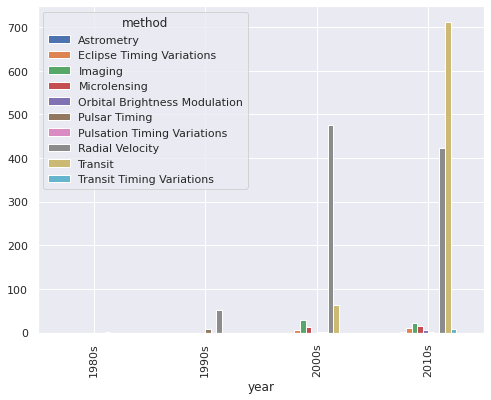

In [112]:
planets_method_decade.T.plot(kind="bar", figsize=(8,6))